In [1]:
import sys, os
import numpy as np
import scipy
from scipy.stats import norm
sys.path.append("../../../quantum-mc") # see os.getcwd()
import matplotlib.pyplot as plt
import quantum_mc.calibration.fitting as ft
import quantum_mc.calibration.time_series as ts
import matplotlib.dates as mdates
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
# AAPL, MSFT, SPX
ticker = "MSFT"
data = ts.get_data(ticker)
((cdf_x, cdf_y), sigma) = ft.get_cdf_data(ticker)
(x, y) = ft.get_fit_data(ticker, norm_to_rel = False)
pl = ft.fit_piecewise_linear(x, y)
pc = ft.fit_piecewise_cubic(x, y)
xf = np.linspace(-3, 3, 100)


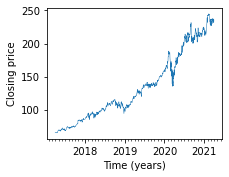

In [2]:
cm = 1 / 2.54
years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y')

fig = plt.figure(figsize=(8*cm,6*cm))  
ax = fig.add_axes([0.2, 0.19, 0.77, 0.77])

#fig, ax = plt.subplots(nrows=1, figsize=(8*cm, 6*cm))
fig.set_facecolor('w')
ax.plot(data.index, data["Close"], linewidth=0.5)
ax.set_xlabel('Time (years)')
ax.set_ylabel('Closing price')

# format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(months)
fig.savefig('hist_series.pdf', format='pdf', facecolor=fig.get_facecolor(), transparent=True) 


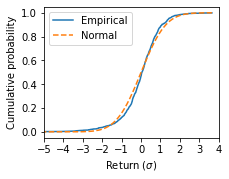

In [3]:
fig = plt.figure(figsize=(8*cm,6*cm))  
ax = fig.add_axes([0.2, 0.19, 0.77, 0.77])
fig.set_facecolor('w')
ax.plot(cdf_x, cdf_y, label="Empirical")
ax.plot(cdf_x, norm.cdf(cdf_x), '--', label="Normal")
ax.set_xlim(-5, 4)
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_major_locator(MultipleLocator(0.2))
ax.set_xlabel('Return ($\sigma$)')
ax.set_ylabel('Cumulative probability')
ax.legend()
fig.savefig('hist_cdf_linear.pdf', format='pdf', facecolor=fig.get_facecolor(), transparent=True)


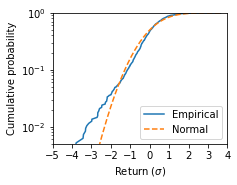

In [4]:
fig = plt.figure(figsize=(8*cm,6*cm))  
ax = fig.add_axes([0.2, 0.19, 0.77, 0.77])
fig.set_facecolor('w')
ax.plot(cdf_x, cdf_y, label="Empirical")
ax.plot(cdf_x, norm.cdf(cdf_x), '--', label="Normal")
ax.set_xlim(-5, 4)
ax.set_ylim(0.005, 1.0)
ax.set_yscale("log")
ax.xaxis.set_major_locator(MultipleLocator(1))
#ax.yaxis.set_major_locator(MultipleLocator(0.2))
ax.set_xlabel('Return ($\sigma$)')
ax.set_ylabel('Cumulative probability')
ax.legend()
fig.savefig('hist_cdf_log.pdf', format='pdf', facecolor=fig.get_facecolor(), transparent=True)

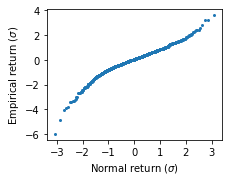

In [7]:
cm = 1 / 2.54
fig = plt.figure(figsize=(8*cm,6*cm))  
ax = fig.add_axes([0.2, 0.19, 0.77, 0.77])
fig.set_facecolor('w')
ax.plot(x, y, "o", markersize = 2, label="Observed")
ax.set_xlabel('Normal return ($\sigma$)')
ax.set_ylabel('Empirical return ($\sigma$)')
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_major_locator(MultipleLocator(2))
fig.savefig('hist_scatter.pdf', format='pdf', facecolor=fig.get_facecolor(), transparent=True)

ipykernel_launcher:12: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "formt" which is no longer supported as of 3.3 and will become an error two minor releases later


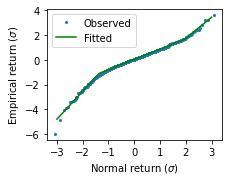

In [59]:
cm = 1 / 2.54
fig = plt.figure(figsize=(8*cm,6*cm))  
ax = fig.add_axes([0.2, 0.19, 0.77, 0.77])
fig.set_facecolor('w')
ax.plot(x, y, "o", markersize = 2, label="Observed")
ax.plot(xf, pl(xf), label="Fitted", color = "green")
ax.set_xlabel('Normal return ($\sigma$)')
ax.set_ylabel('Empirical return ($\sigma$)')
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_major_locator(MultipleLocator(2))
ax.legend()
fig.savefig('hist_scatter_fitted.pdf', formt='pdf', facecolor=fig.get_facecolor(), transparent=True)

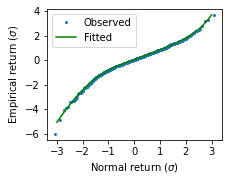

In [8]:
cm = 1 / 2.54
fig = plt.figure(figsize=(8*cm,6*cm))  
ax = fig.add_axes([0.2, 0.19, 0.77, 0.77])
fig.set_facecolor('w')
ax.plot(x, y, "o", markersize = 2, label="Observed")
ax.plot(xf, pc(xf), label="Fitted", color = "green")
ax.set_xlabel('Normal return ($\sigma$)')
ax.set_ylabel('Empirical return ($\sigma$)')
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_major_locator(MultipleLocator(2))
ax.legend()
fig.savefig('hist_scatter_spline_fitted.pdf', format='pdf', facecolor=fig.get_facecolor(), transparent=True)

ipykernel_launcher:15: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "formt" which is no longer supported as of 3.3 and will become an error two minor releases later


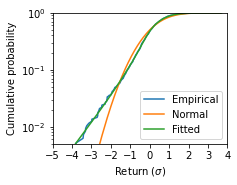

In [58]:
fig = plt.figure(figsize=(8*cm,6*cm))  
ax = fig.add_axes([0.2, 0.19, 0.77, 0.77])
fig.set_facecolor('w')
ax.plot(cdf_x, cdf_y, label="Empirical")
ax.plot(cdf_x, norm.cdf(cdf_x), '--', label="Normal")
ax.plot(pc(xf), norm.cdf(xf), ':', label="Fitted") # plot the fitted 
ax.set_xlim(-5, 4)
ax.set_ylim(0.005, 1.0)
ax.set_yscale("log")
ax.xaxis.set_major_locator(MultipleLocator(1))
#ax.yaxis.set_major_locator(MultipleLocator(0.2))
ax.set_xlabel('Return ($\sigma$)')
ax.set_ylabel('Cumulative probability')
ax.legend()
fig.savefig('hist_cdf_fitted_log.pdf', formt='pdf', facecolor=fig.get_facecolor(), transparent=True)

In [72]:
lookup = scipy.interpolate.interp1d(norm.cdf(cdf_x), cdf_x)
print(lookup(0.01))
lookup = scipy.interpolate.interp1d(cdf_y, cdf_x)
print(lookup(0.01))
lookup = scipy.interpolate.interp1d(norm.cdf(xf), pc(xf))
print(lookup(0.01))

-2.3313347243063376
-3.2640751037998235
-3.176579525888839


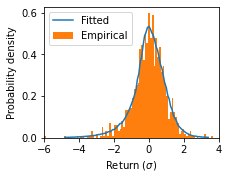

In [5]:
rets = ts.returns(ticker) # 10 day log returns
rets = rets - np.mean(rets)      
# normalize returns into units of (maximum-likelihood-estimated) standard deviations
sig = np.std(rets)
rets = rets / sig

# create discretised version
import scipy
cdf_fn = scipy.interpolate.interp1d(pc(xf), norm.cdf(xf))
def pdf_fn(x):
    return (cdf_fn(x + 1e-9) - cdf_fn(x - 1e-9)) / 2e-9
xf2 = np.linspace(-4.8, 3.4, 100)
#plt.plot(xf2, cdf_fn(xf2))

fig = plt.figure(figsize=(8*cm,6*cm))  
ax = fig.add_axes([0.2, 0.19, 0.77, 0.77])
fig.set_facecolor('w')
plt.plot(xf2, pdf_fn(xf2), label = "Fitted")
ax.hist(rets, density = True, bins = 100, label = "Empirical")
ax.set_xlim(-6, 4)
ax.set_xlabel('Return ($\sigma$)')
ax.set_ylabel('Probability density')
ax.legend()
fig.savefig('hist_pdf_spline_fitted.pdf', format='pdf', facecolor=fig.get_facecolor(), transparent=True)

In [6]:
from qiskit import execute, Aer, QuantumCircuit, QuantumRegister, ClassicalRegister, AncillaRegister
from qiskit.aqua.algorithms import IterativeAmplitudeEstimation
from qiskit.circuit.library import NormalDistribution, LogNormalDistribution, LinearAmplitudeFunction, IntegerComparator, WeightedAdder
from qiskit.visualization import plot_histogram

from quantum_mc.probability_distributions.gaussian_copula import GaussianCopula
rho = ts.correl(ts.returns("AAPL"), ts.returns("MSFT"))

mu = [0, 0]
sigma = [[1, rho], [rho, 1]]

num_qubits = [4, 4]
bounds = [(-3.4, 3.4), (-3.4, 3.4)] 

def F(x):
    return cdf_fn(x)
    #return norm.cdf(x)

def f(x):
    return pdf_fn(x)
    #return norm.pdf(x)

cdfs = [F, F]
pdfs = [f, f]

pdf_circ = GaussianCopula(num_qubits, cdfs, sigma=sigma, bounds=bounds, pdfs = pdfs)
#pdf_circ = NormalDistribution(num_qubits, mu=mu, sigma=sigma, bounds=bounds)

qr_state1 = QuantumRegister(4, 'state1')
qr_state2 = QuantumRegister(4, 'state2')
state_out = ClassicalRegister(4, 'state_out')
circ = QuantumCircuit(qr_state1, qr_state2, state_out)
circ.append(pdf_circ, qr_state1[:] + qr_state2[:])
circ.measure(qr_state1, state_out)

circ.draw()

C:\Users\joemo\AppData\Local\Programs\Python\Python37\lib\site-packages\qiskit\aqua\__init__.py:86: DeprecationWarning: The package qiskit.aqua is deprecated. It was moved/refactored to qiskit-terra For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  warn_package('aqua', 'qiskit-terra')


┌───────┐┌─┐         
   state1_0: ┤0      ├┤M├─────────
             │       │└╥┘┌─┐      
   state1_1: ┤1      ├─╫─┤M├──────
             │       │ ║ └╥┘┌─┐   
   state1_2: ┤2      ├─╫──╫─┤M├───
             │       │ ║  ║ └╥┘┌─┐
   state1_3: ┤3      ├─╫──╫──╫─┤M├
             │  P(X) │ ║  ║  ║ └╥┘
   state2_0: ┤4      ├─╫──╫──╫──╫─
             │       │ ║  ║  ║  ║ 
   state2_1: ┤5      ├─╫──╫──╫──╫─
             │       │ ║  ║  ║  ║ 
   state2_2: ┤6      ├─╫──╫──╫──╫─
             │       │ ║  ║  ║  ║ 
   state2_3: ┤7      ├─╫──╫──╫──╫─
             └───────┘ ║  ║  ║  ║ 
state_out: 4/══════════╩══╩══╩══╩═
                       0  1  2  3

In [8]:
pdf_circ._probabilities
pdf_circ._values
pdf_circ._values[0]

comb = list(zip(pdf_circ._values, pdf_circ._probabilities))
print(comb[0])

values = sorted(set(map(lambda x:x[0], pdf_circ._values)))
#newlist = [sum([y[0] for y in values if y[1]==x]) for x in values]
print(values)
probs = [sum([y[1] for y in comb if y[0][0]==x]) for x in values]
print(probs)

((-3.4, -3.4), 0.00020223594456667901)
[-3.4, -2.9466666666666668, -2.493333333333333, -2.04, -1.5866666666666667, -1.1333333333333333, -0.6800000000000002, -0.22666666666666657, 0.22666666666666657, 0.6800000000000002, 1.1333333333333333, 1.5866666666666664, 2.0399999999999996, 2.4933333333333327, 2.9466666666666668, 3.4]
[0.0033144409347632127, 0.005611300008394761, 0.009281983333858287, 0.01738308168850529, 0.030919533795282967, 0.05906634429599672, 0.11689001389205177, 0.22715020057272414, 0.22923365644327237, 0.16300380144528503, 0.08589463508966858, 0.03260789699951243, 0.012391595227482434, 0.004526074459703664, 0.001835160646438505, 0.0008902811670598892]


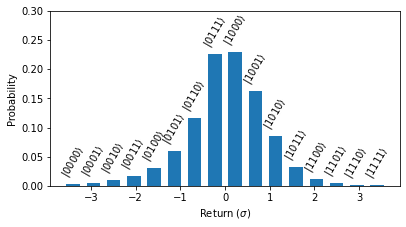

In [9]:
#plt.plot(values, probs)
fig = plt.figure(figsize=(2*8*cm,8*cm))  
ax = fig.add_axes([0.2, 0.19, 0.77, 0.77])
fig.set_facecolor('w')
rects = ax.bar(values, probs, width = 0.3)
ax.set_ylim(0, 0.3)
ax.set_xlabel('Return ($\sigma$)')
ax.set_ylabel('Probability')
labels = [r"$ | " + "{:04b}".format(i) + r" \rangle $" for i in range(len(values))]
ax.bar_label(rects, padding=4, labels = labels, rotation=60)
fig.savefig('hist_state.pdf', format='pdf', facecolor=fig.get_facecolor(), transparent=True)
#plt.plot(xf2, pdf_fn(xf2), label = "Fitted")

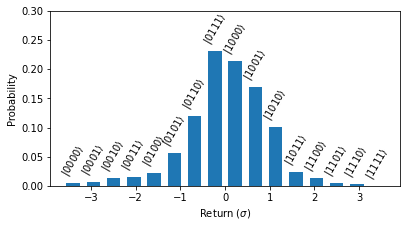

In [29]:
#fig = plt.figure(figsize=(8*cm,6*cm))  
counts = execute(circ, Aer.get_backend('qasm_simulator', shots = 10000)).result().get_counts()
#plot_histogram(counts, figsize=(9,5))

fig = plt.figure(figsize=(2*8*cm,8*cm))  
ax = fig.add_axes([0.2, 0.19, 0.77, 0.77])
fig.set_facecolor('w')

cnts = [counts.get(('{0:0%sb}' % 4).format(i), 0) for i, v in enumerate(values)] 
cnts = np.array(cnts)
cnts = cnts / sum(cnts)
rects = ax.bar(values, cnts, width = 0.3)
ax.set_ylim(0, 0.3)
ax.set_xlabel('Return ($\sigma$)')
ax.set_ylabel('Probability')
labels = [r"$ | " + "{:04b}".format(i) + r" \rangle $" for i in range(len(values))]
ax.bar_label(rects, padding=4, labels = labels, rotation=60)
fig.savefig('hist_state_simulated.pdf', format='pdf', facecolor=fig.get_facecolor(), transparent=True)

In [ ]:
shots=1000
#sim_statevector = Aer.get_backend('statevector_simulator')
job = execute(circ, Aer.get_backend('statevector_simulator'))
result = job.result()

outputstate = result.get_statevector(circ, decimals=3)

from qiskit.visualization import plot_state_city
plot_state_city(outputstate)


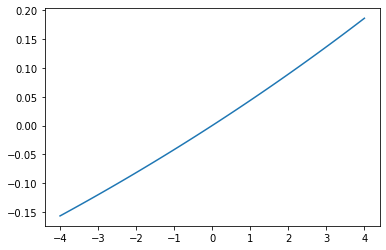

In [7]:

plt.plot(np.linspace(-4, 4, 100), np.exp(np.linspace(-4, 4, 100) * sigma) - 1)

In [13]:
Aer.backends()

[QasmSimulator(
 backend_name='qasm_simulator', provider=AerProvider()),
 StatevectorSimulator(
 backend_name='statevector_simulator', provider=AerProvider()),
 UnitarySimulator(
 backend_name='unitary_simulator', provider=AerProvider()),
 PulseSimulator(
 backend_name='pulse_simulator', provider=AerProvider())]